In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Part2_data.csv')
data = pd.DataFrame(data).to_numpy()
data

array([[ 4.99999989e-03,  2.89560594e-02, -9.81234837e+00,
         5.70465066e-02,  4.50657157e-04],
       [ 9.99999978e-03,  1.21038686e-02, -9.80734921e+00,
         2.67876126e-02,  4.50657157e-04],
       [ 1.49999997e-02,  2.06048544e-02, -9.82693100e+00,
         3.96061242e-02,  4.50657157e-04],
       ...,
       [ 3.06299992e+01,  4.35186177e-02, -9.67431927e+00,
         5.75205497e-02,  5.18487161e-03],
       [ 3.06350002e+01,  7.85710104e-03, -9.61473751e+00,
         3.51134986e-02,  1.93967856e-02],
       [ 3.06399994e+01,  6.49389029e-02, -9.52110577e+00,
         7.64240101e-02,  3.83151025e-02]])

In [21]:
# Here we shall be calculating non-weighted fits for y-error estimation
accel = data[1000:,2]
force = data[1000:,4]
time = data[1000:,0]

# # Creates an interpolating function 
# accel_interp = interp1d(time, accel, kind="linear")
# force_interp = interp1d(time, force, kind="linear")

# step_size = 0.005
# time = np.arange(time[0], ma(time)x, step_size) # Gives times at which we want y values

# accel = accel_interp(time) # Function that interpolates accel values at all t values
# force = force_interp(time) # likewise

# plt.plot(time, accel)
# plt.show()


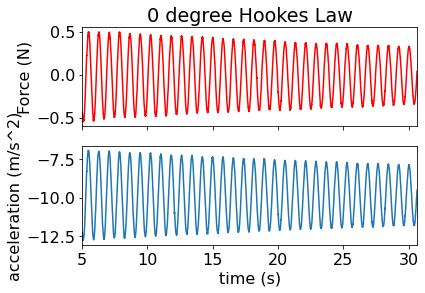

In [22]:
# Two subplots, the axes array is shared
# Choose the sensor for fitting.
f, axarr = plt.subplots(2, sharex=True)
plt.xlim(5, max(time))
axarr[0].plot(time, force,'r')
axarr[0].set_title('0 degree Hookes Law')
axarr[0].set_ylabel('Force (N)')
axarr[1].plot(time, accel)
axarr[1].set_xlabel('time (s)')
axarr[1].set_ylabel('acceleration (m/s^2)')
plt.show()

In [23]:
# Defines the various oscillator models that we fit to:

# Simple harmonic motion using acceleration
def simple_a(t, A, B, w, phi):                  # inputs: t:time, A:amplitude, B:offset, w:angular frequency, phi:phase
    return B - A * (w**2) * np.cos(w*t + phi)   # output: acceleration

# Simple harmonic motion using position
def simple_y(t, A, B, w, phi):       # inputs: t:time, A:amplitude, B:offset, w:angular frequency, phi:phase
    return B + A*np.cos(w*t + phi)   # output: position

# Velocity-dependent friction using acceleration
def vdamped_a(t, A, B, w, phi, beta):    # inputs: t:time, A:amplitude, B:offset, w:ang. frequency, phi:phase, beta:damping
    return B + A * np.exp(-beta*t) * ((beta**2-w**2)*np.cos(w*t + phi)+2*beta*w*np.sin(w*t+phi))   # output: acceleration

# Velocity-dependent friction using position
def vdamped_y(t, A, B, w, phi, beta):    # inputs: t:time, A:amplitude, B:offset, w:ang. frequency, phi:phase, beta:damping
    return B + A * np.exp(-beta*t) * np.cos(w*t + phi)        # output: position


In [55]:
oscillator_model=simple_a
start_pars =[3/49, 0, 7, 0]
pars, cov = opt.curve_fit(oscillator_model, time, accel, p0=start_pars)

[A, B, w, phi] = pars
std_errs = np.sqrt(np.diag(cov))

print(np.transpose([pars, std_errs]))

[[-4.53086998e-03  6.68191462e-04]
 [-9.85980557e+00  2.36903352e-02]
 [ 7.08583576e+00  1.98552037e-02]
 [-1.14342931e-01  3.82275580e-01]]


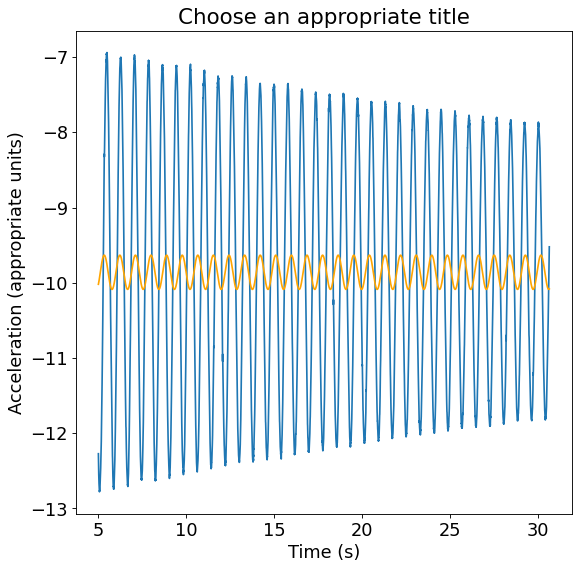

In [56]:
accel_pred = oscillator_model(time, A, B, w, phi)

# Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

# Data and fit
plt.plot(time, accel)
plt.plot(time, accel_pred, color='orange')


# Axes label and title
plt.title("Choose an appropriate title")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (appropriate units)")
plt.show()


In [14]:
def model_lin(x, m, c):
    return m * x + c

def norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 

In [9]:
mInit = 0.5
cInit = 0.2

parameters, covariance = opt.curve_fit(model_lin, y_accel, force, p0=[mInit,cInit]) # Simple regression

slope_s = parameters[0] # Simple regression slope

NameError: name 'y_accel' is not defined

In [ ]:
# Weighted regression. Note we use linear model still, as we have already linearized our data to (T^2, I)
parameters, covariance = opt.curve_fit(model_lin, y_accel, force, p0=[mInit,cInit])

slope = parameters[0] # Weighted regression slope
intcp = parameters[1] # Weighted regression intercept
slope_err = np.sqrt(covariance[0][0]) # Weighted regression slope error
intcp_err = np.sqrt(covariance[1][1]) # Weighted regression intercep error

y_model = model_lin(force, slope, intcp) # Y values predicted with our model

In [ ]:
# Force vs Acceleration graph
plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(y_accel, force, fmt='o', capsize = 3, capthick = 1, label="data point")
plt.errorbar(np.linspace(-13,7), model_lin(np.linspace(-13,7), slope, intcp), label='fit')

plt.title("Force vs Acceleration")
plt.xlabel('Acceleration ($m/s^2$)')
plt.ylabel('Force (N)')
plt.xlim(-13, -7)
plt.ylim(-0.6, 0.5)
plt.legend()
plt.show()